# Analyzing FAANG Stocks: Returns, Risk & Correlation

## 📊 Introduction

This notebook analyzes the stock performance of five major U.S. tech companies — Meta (META), Amazon (AMZN), Apple (AAPL), Netflix (NFLX), and Google (GOOG) — commonly referred to as the FAANG stocks (formerly including Facebook).

Using historical Adjusted Close price data from Yahoo Finance, this analysis focuses on evaluating the behavior and relationships of these stocks over time. The objective is to better understand their return characteristics, risk profile, and how they relate to one another in terms of correlation and volatility.

### Key topics covered:
- Daily simple returns
- Mean and volatility of returns
- Daily cumulative simple returns
- Covariance and correlation matrix
- Data visualization of trends and inter-stock relationships

## Load data

In [32]:
# Import libraries
from datetime import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [62]:
# Get stock symbols for the portfolio
stockSymbols = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]

In [76]:
stockStartDate = '2013-01-01'
today = datetime.today().strftime("%Y-%m-%d")

In [77]:
# Get stock prices in the portfolio
def getMyPortfolio(stocks, start, end, col='Adj Close'):
  data = yf.download(stocks, start=start, end=end, auto_adjust=False)[col]
  return data


In [78]:
# Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols, stockStartDate, today)
my_stocks

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,16.669004,12.865500,17.928810,27.868654,13.144286
2013-01-03,16.458614,12.924000,17.939224,27.639734,13.798571
2013-01-04,16.000170,12.957500,18.293707,28.625092,13.711429
2013-01-07,15.906045,13.423000,18.213888,29.281992,14.171429
2013-01-08,15.948857,13.319000,18.177942,28.923681,13.880000
...,...,...,...,...,...
2025-04-07,181.460007,175.259995,149.240005,516.250000,867.830017
2025-04-08,172.419998,170.660004,146.580002,510.450012,870.400024
2025-04-09,198.850006,191.100006,161.059998,585.770020,945.469971


In [79]:
my_stocks.keys()[0]

'AAPL'

## Visualisations

In [80]:
def show_graph(stocks, start, end, col= 'Adj Close'):
  title = "Portfolio" +col+ " Price history"

  my_stocks = getMyPortfolio(stocks, start, end, col)
  plt.figure(figsize=(10, 5))

  for stock_name in my_stocks.keys():
    plt.plot(my_stocks[stock_name], label=stock_name)

  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(col +' Price USD ($)', fontsize=18)
  plt.legend(my_stocks.keys(), loc="upper left")
  plt.show()

[*********************100%***********************]  5 of 5 completed


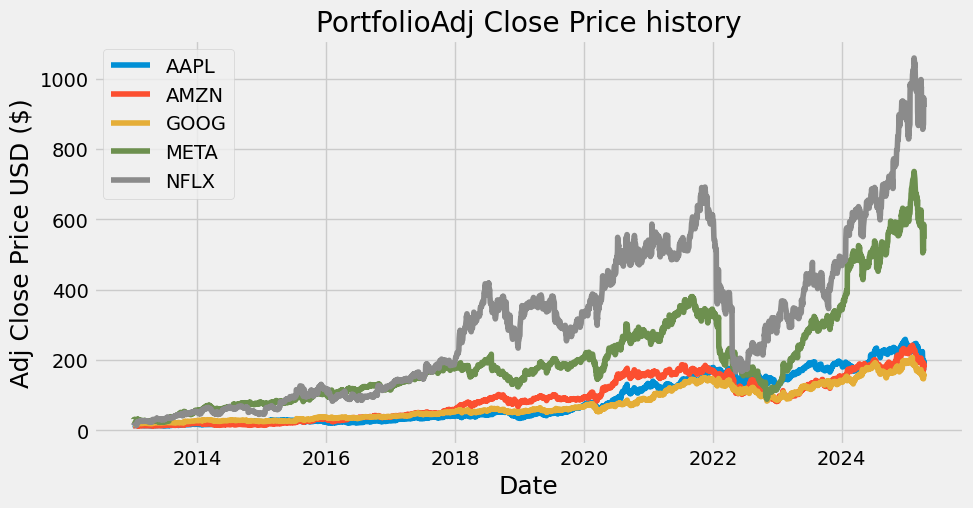

In [81]:
show_graph(stockSymbols, stockStartDate, today)

## Analysis of FAANG

### Simple returns
It is a straightforward calculation of an investment performance, showing the percentage gain or loss over a period

SimpleReturn = (Ending Value - Start Value) / Start Value

Why it's useful: Shows day-to-day performance of each stock

In [83]:
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,-0.008214,0.049777
2013-01-04,-0.027854,0.002592,0.019760,0.035650,-0.006315
2013-01-07,-0.005883,0.035925,-0.004363,0.022948,0.033549
2013-01-08,0.002692,-0.007748,-0.001974,-0.012237,-0.020565
...,...,...,...,...,...
2025-04-07,-0.036734,0.024912,0.010153,0.022824,0.013986
2025-04-08,-0.049818,-0.026247,-0.017824,-0.011235,0.002961
2025-04-09,0.153289,0.119770,0.098786,0.147556,0.086248


### Stock Correlation
In the stock market, correlation refers to the tendency of two or more stocks to move together, either in the same direction (positive correlation) or in opposite directions (negative correlation). Correlation is measured using the correlation coefficient, which ranges from -1 to +1. A value of +1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

Positive Correlation.

Correlation is closely tied to diversification, the concept that certain types of risk can be mitagated by investing in assest that are not correlated

In [105]:
daily_simple_returns.corr()

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,1.000000,0.500689,0.554703,0.474977,0.323450
AMZN,0.500689,1.000000,0.628351,0.560790,0.471630
GOOG,0.554703,0.628351,1.000000,0.584900,0.417813
META,0.474977,0.560790,0.584900,1.000000,0.405798
NFLX,0.323450,0.471630,0.417813,0.405798,1.000000


### Covariance matrix
It provides insight into how assest move together, however, covariance indicates the direction of the relationship – positive covariance means assets move in the same direction, while negative covariance means they move in opposite directions. However, covariance values are not standardized, and they can be difficult to interpret directly. This is not the case of correlation, where the values are standarised in a range from -1 to +1

The higher the variance, the higher the risk, higher return and higher volatility, and viceversa


In [106]:
daily_simple_returns.cov()

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,0.000324,0.000185,0.000175,0.000207,0.000168
AMZN,0.000185,0.000420,0.000225,0.000278,0.000278
GOOG,0.000175,0.000225,0.000306,0.000247,0.000210
META,0.000207,0.000278,0.000247,0.000586,0.000283
NFLX,0.000168,0.000278,0.000210,0.000283,0.000828


In [107]:
# Show only variance
daily_simple_returns.var()

,0
Ticker,
AAPL,0.000324
AMZN,0.000420
GOOG,0.000306
META,0.000586
NFLX,0.000828


### Std Deviation == Volatility
Shows how much returns fluctuate -- i.e., risk

We can see that the most volatile stock is Netflix and the least is Google. Therefore we can expect lower returns from Google than Netflix

In [109]:
daily_simple_returns.std()

,0
Ticker,
AAPL,0.018001
AMZN,0.020502
GOOG,0.017485
META,0.024200
NFLX,0.028771


Text(0, 0.5, 'Daily Simple Returns')

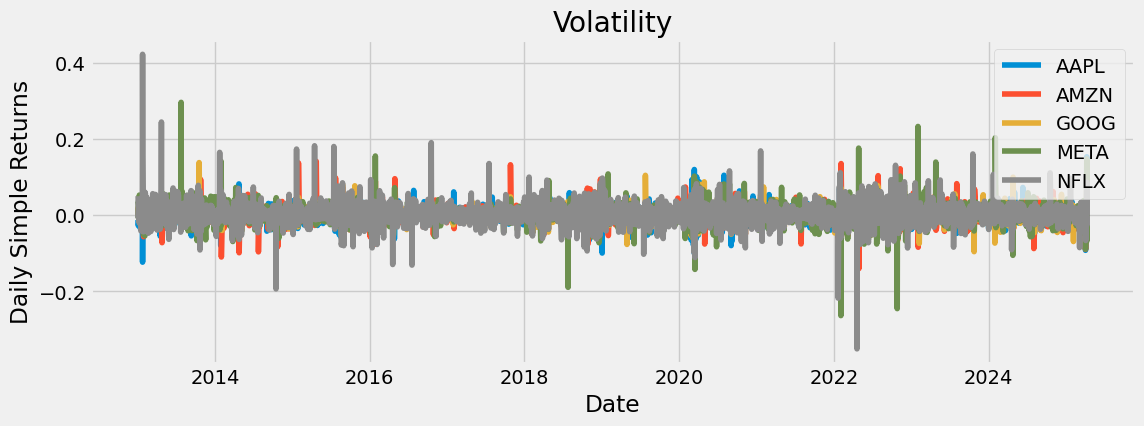

In [113]:
plt.figure(figsize=(12, 4))

for stock in daily_simple_returns.keys():
  plt.plot(daily_simple_returns[stock], label=stock)

plt.legend(daily_simple_returns.keys(), loc='upper right')
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')

In [119]:
# Mean of the daily simple returns
dailyMeanSimpleReturns = daily_simple_returns.mean()

# We can expect a daily return of 0.001 for AMZN
dailyMeanSimpleReturns



,0
Ticker,
AAPL,0.000964
AMZN,0.001073
GOOG,0.000860
META,0.001255
NFLX,0.001787


In [126]:
# Expected portfolio daily return
stocksWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1])

portfolioDailySimpleReturn = np.sum(dailyMeanSimpleReturns*stocksWeights)
print("Expected portfolio returns are: "+ str(portfolioDailySimpleReturn.round(4)))

Expected portfolio returns are: 0.0011


In [129]:
# Yearly simple return
print("Expected annualised portfolio simple return is: " +str(portfolioDailySimpleReturn*253)) # 253 are the number of trading days

Expected annualised portfolio simple return is: 0.2669362173583167


### Growth of the investment
Calculate the total returns from our investment. In this example we show how much growth over time our invesments would make if a $1 was invested on each stock at the start of 2013

In [137]:
dailyCumulSimpleReturn = (1+ daily_simple_returns).cumprod()
dailyCumulSimpleReturn

Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.987378,1.004547,1.000581,0.991786,1.049777
2013-01-04,0.959876,1.007151,1.020353,1.027143,1.043147
2013-01-07,0.954229,1.043333,1.015901,1.050714,1.078144
2013-01-08,0.956797,1.035249,1.013896,1.037857,1.055972
...,...,...,...,...,...
2025-04-07,10.886073,13.622478,8.324033,18.524396,66.023366
2025-04-08,10.343749,13.264933,8.175668,18.316278,66.218889
2025-04-09,11.929327,14.853678,8.983307,21.018956,71.930112


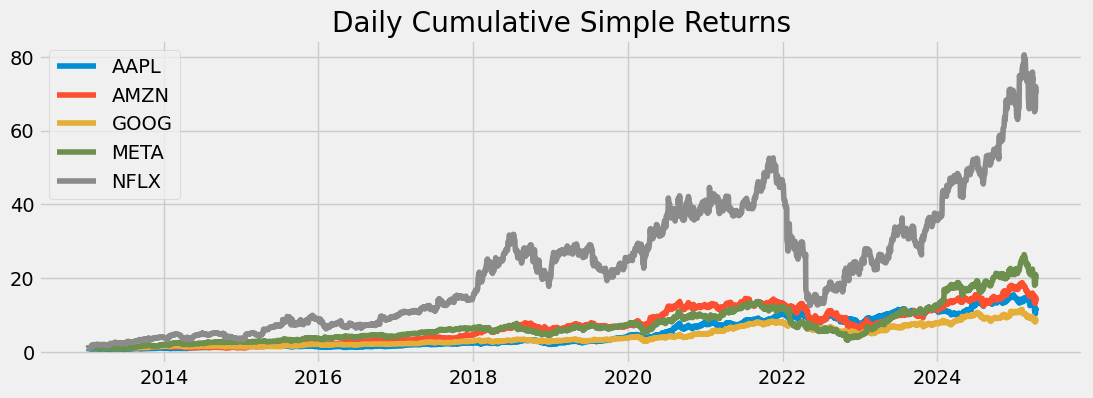

In [140]:
plt.figure(figsize=(12,4))
for stock in dailyCumulSimpleReturn.keys():
  plt.plot(dailyCumulSimpleReturn[stock], label=stock)

plt.title('Daily Cumulative Simple Returns')
plt.legend(dailyCumulSimpleReturn.keys(), loc='upper left')
plt.show()